### Wave 4 (IFLS4) Employment Sector
Author: Sanhorn Chen

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/Users/sanhorn/Desktop/Internships/Econ Data Lab/IFLS4 Dataset/Data/b3a_tk3.csv")
df

,hhid07_9,pid07,tk28year,tk28,tk30x,tk31x,tk31,tk32x,tk32,tk33,tk33pid,tk33a,hhid07,pidlink,occ2007,tk31a,version,module
0,1220000,1,2007,1,1.0,1.0,GETAH KARET,1.0,BERTANI KARET,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
1,1220000,1,2006,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
2,1220000,1,2005,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
3,1220000,1,2004,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
4,1220000,1,2003,1,3.0,3.0,NaN,3.0,NaN,2.0,NaN,3.0,12200,1220001,062,1.0,1,B3A_TK3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209200,321300000,2,2003,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209201,321300000,2,2002,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209202,321300000,2,2001,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3
209203,321300000,2,2000,1,3.0,3.0,NaN,3.0,NaN,4.0,NaN,3.0,3213000,321300002,039,9.0,1,B3A_TK3


In [4]:
tmp_df = df.copy()
selected_columns = ["hhid07_9", "pid07", "tk28year", "tk28", "tk31a"]
tmp_df = tmp_df[selected_columns]

tmp_df["person"] = tmp_df["hhid07_9"].astype(str) + tmp_df["pid07"].astype(str)
tmp_df = tmp_df.drop(columns = ["hhid07_9", "pid07"])
print("tk31a NaN number: " + str(len(tmp_df[tmp_df["tk31a"].isna()])))
print("tk28 doesn't have job number: " + str(len(tmp_df[tmp_df["tk28"] != 1])))



tk31a NaN number: 52608
tk28 doesn't have job number: 52608


In [5]:
mapping = {
    1: "Agriculture, forestry, fishing and hunting",
    2: "Mining and quarrying",
    3: "Manufacturing",
    4: "Electricity, gas, water",
    5: "Construction",
    6: "Wholesale, retail, restaurants and hotels",
    7: "Transportation, storage and communications",
    8: "Finance, insurance, real estate and business services",
    9: "Social services",
    10: "Activities that cannot be classified"
}

In [6]:
sector_dfs = {}

# Create dataframes for each sector (1-10) and one for NaN values
all_years = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007"]

# Process each sector
for sector in list(range(1, 11)) + ['NaN']:
    # Create empty dataframe with required columns
    columns = ["Person"] + all_years
    new_df = pd.DataFrame(columns=columns)
    
    # Filter data for this sector
    if sector == 'NaN':
        sector_data = tmp_df[tmp_df['tk31a'].isna()]
    else:
        sector_data = tmp_df[tmp_df['tk31a'] == sector]
    
    # Get unique persons in this sector
    unique_persons = sector_data['person'].unique()
    
    # Process each person
    for person in unique_persons:
        # Create a new row for this person
        row_data = {'Person': person}
        
        # Initialize all years with NaN
        for year in all_years:
            row_data[year] = np.nan
        
        # Get this person's data from the sector dataframe
        person_data = sector_data[sector_data['person'] == person]
        
        # Fill in job status for each year
        for _, row in person_data.iterrows():
            year = str(int(row['tk28year']))
            if year in all_years:  # Only process years in our range
                if row['tk28'] == 1:
                    row_data[year] = 'has job'
                elif row['tk28'] == 3:
                    row_data[year] = 'no job'
                else:
                    row_data[year] = row['tk28']
        
        # Add row to dataframe
        new_df.loc[len(new_df)] = row_data
    
    # Store the dataframe
    if sector == 'NaN':
        sector_dfs['NaN'] = new_df
    else:
        sector_dfs[sector] = new_df

In [7]:
for sector, df_sector in sector_dfs.items():
    if sector == "NaN":
        file_name = "sector_NaN.csv"
    else:
        file_name = f"sector_{sector}.csv"
    df_sector.to_csv(file_name, index=False)

In [8]:
for sector, df in sector_dfs.items():
    print(f"Sector {sector}: {len(df)} rows")

Sector 1: 7158 rows
Sector 2: 136 rows
Sector 3: 3461 rows
Sector 4: 70 rows
Sector 5: 1077 rows
Sector 6: 5324 rows
Sector 7: 737 rows
Sector 8: 168 rows
Sector 9: 4656 rows
Sector 10: 3 rows
Sector NaN: 12107 rows


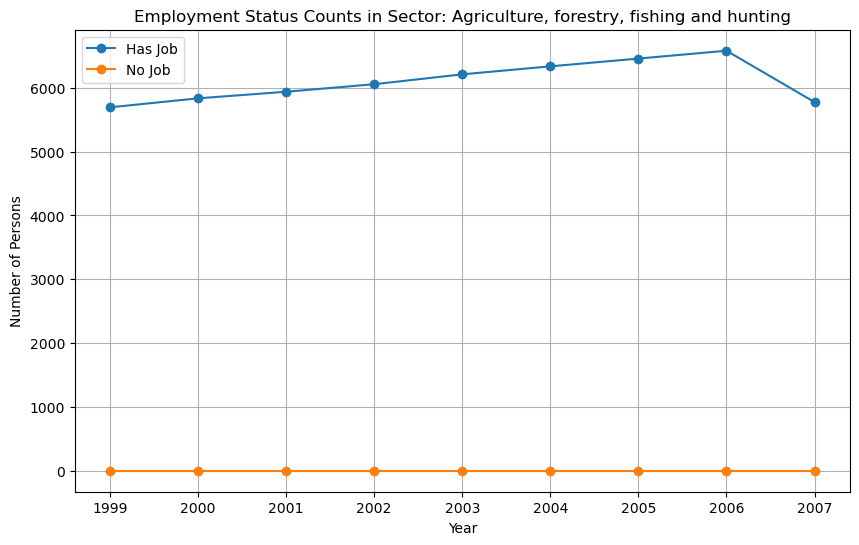

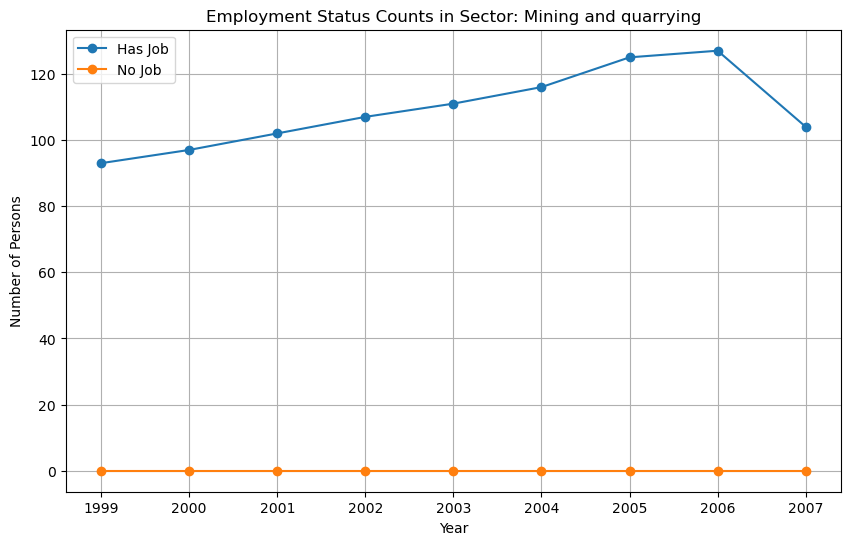

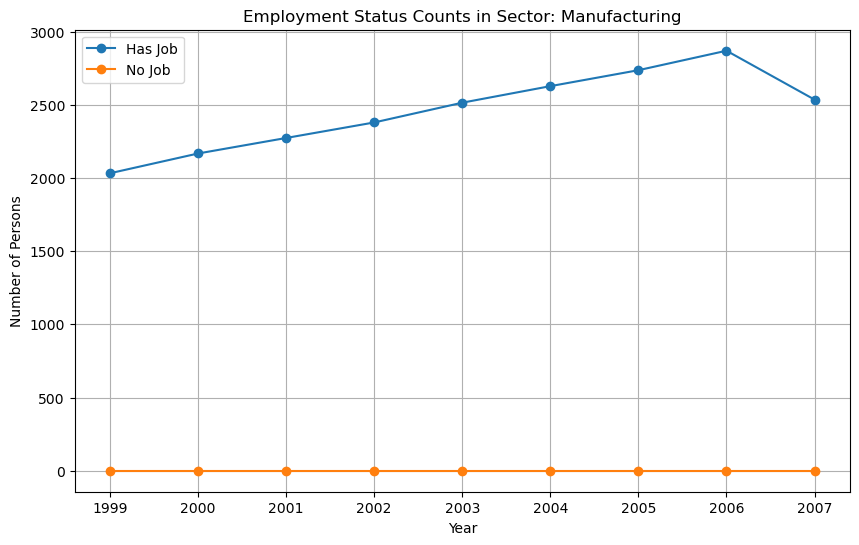

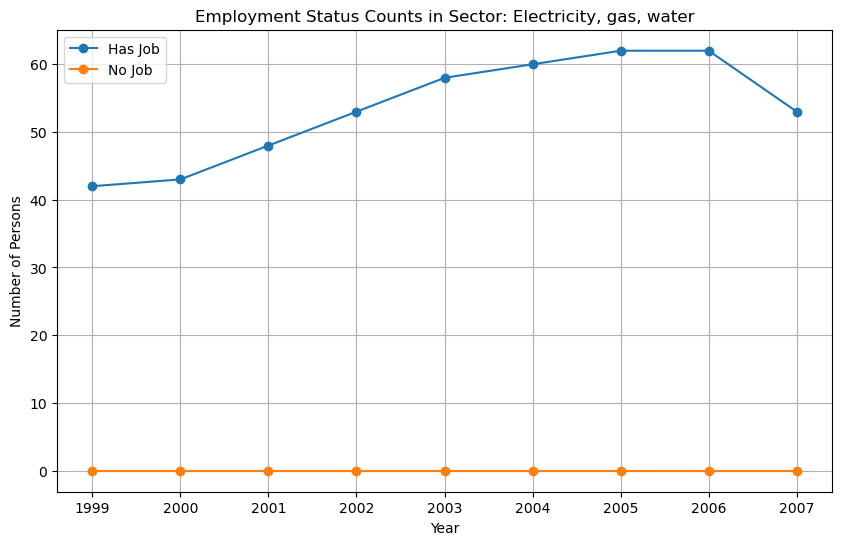

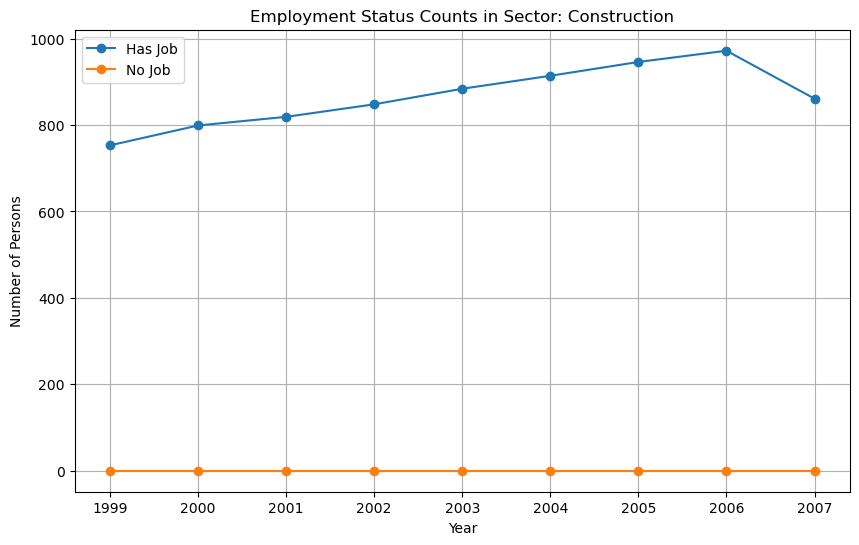

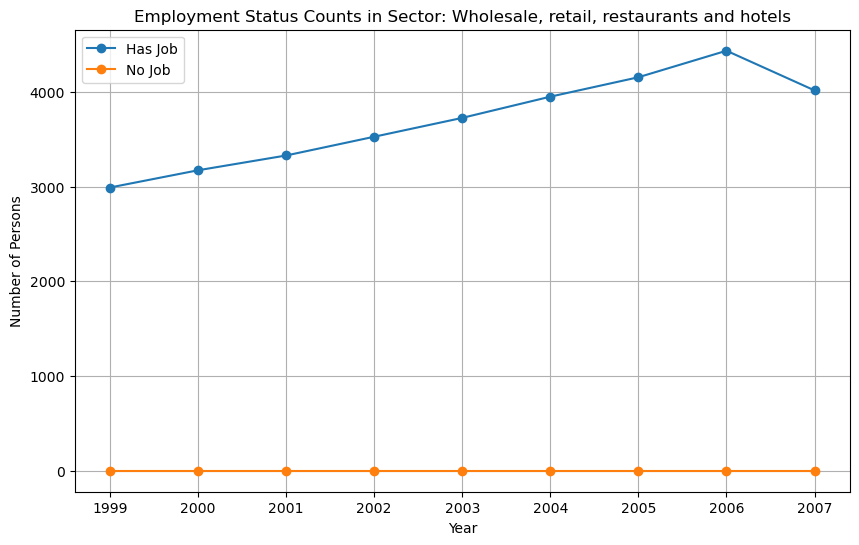

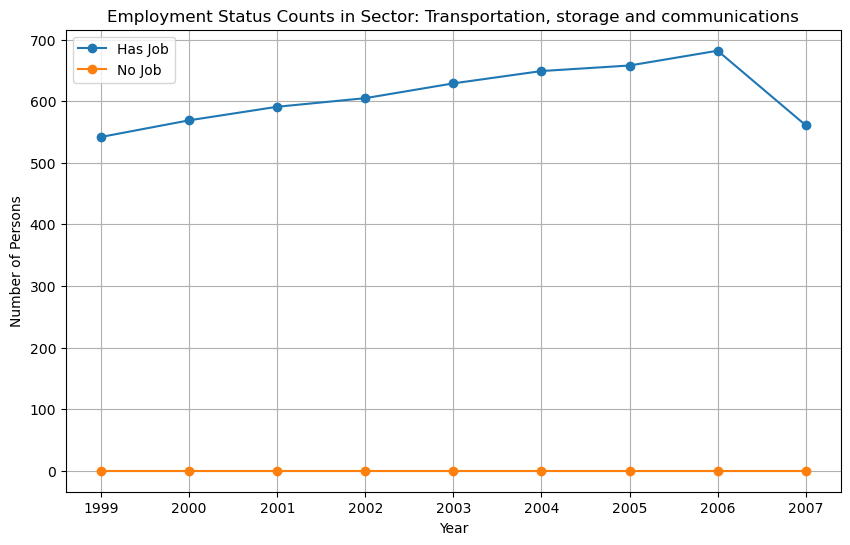

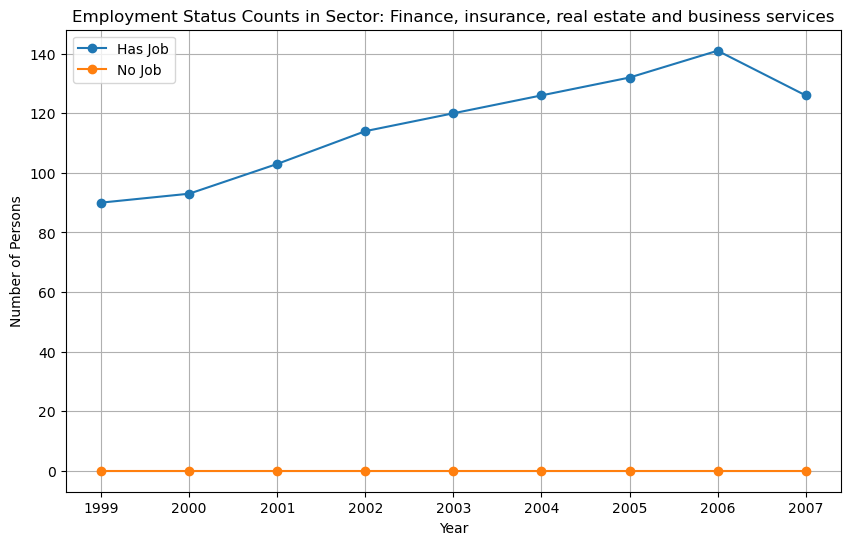

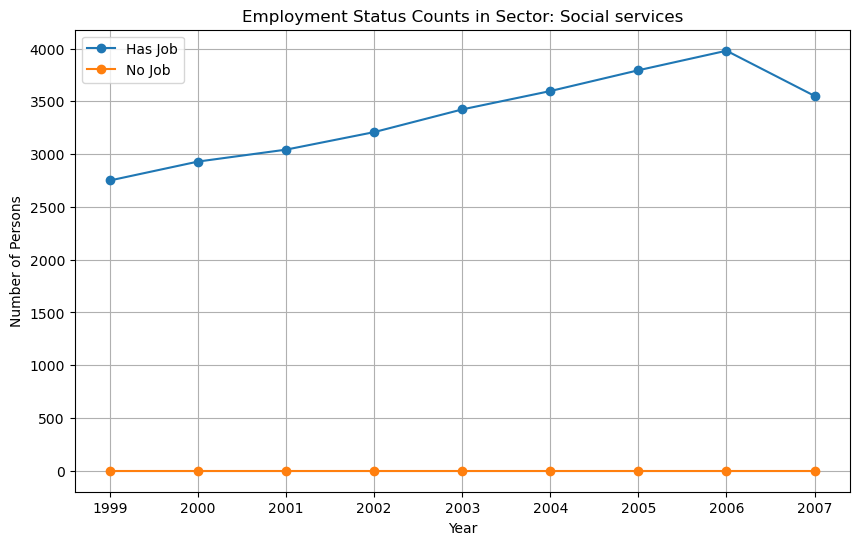

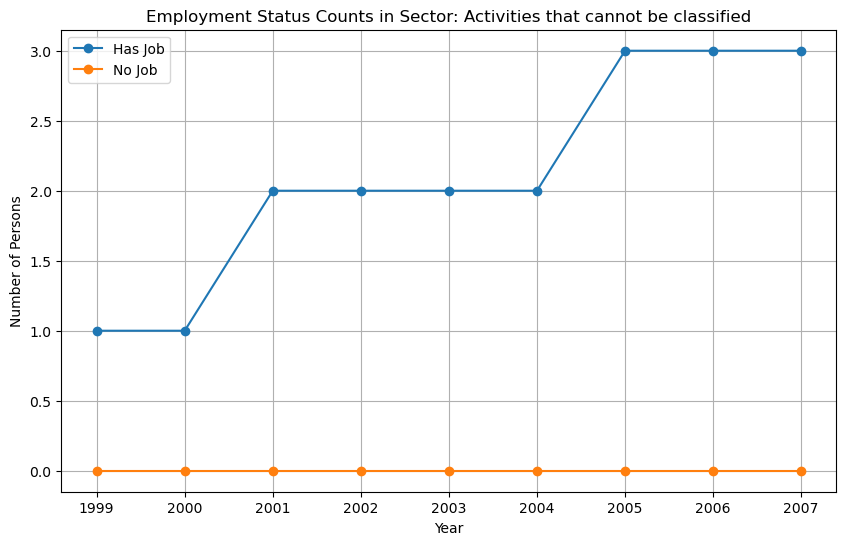

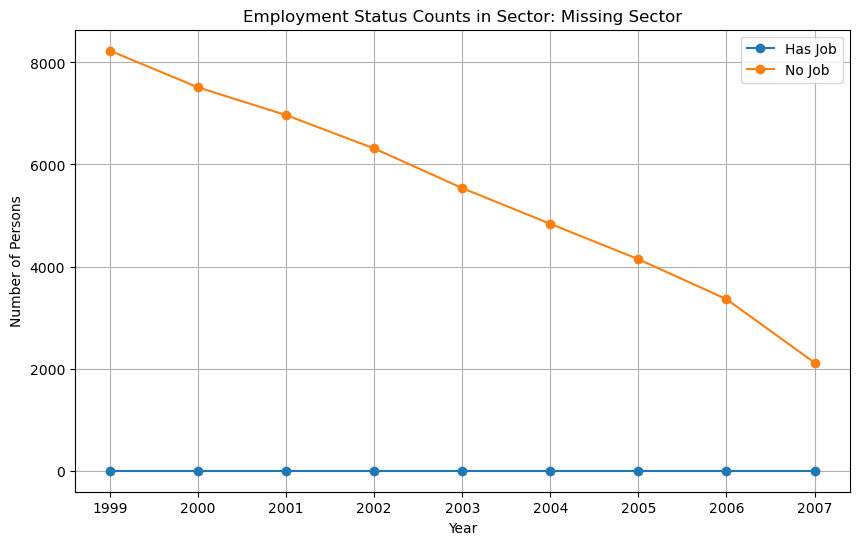

In [9]:
import matplotlib.pyplot as plt

# Mapping for sector names
mapping = {
    1: "Agriculture, forestry, fishing and hunting",
    2: "Mining and quarrying",
    3: "Manufacturing",
    4: "Electricity, gas, water",
    5: "Construction",
    6: "Wholesale, retail, restaurants and hotels",
    7: "Transportation, storage and communications",
    8: "Finance, insurance, real estate and business services",
    9: "Social services",
    10: "Activities that cannot be classified"
}

# Define the years (x-axis)
all_years = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007"]

# Loop over each sector's DataFrame in sector_dfs
for sector, df_sector in sector_dfs.items():
    # Use mapping for numeric sectors; for 'NaN' label as "Missing Sector"
    if sector != "NaN":
        sector_name = mapping.get(int(sector), f"Sector {sector}")
    else:
        sector_name = "Missing Sector"
    
    # Prepare lists to store counts for each employment status per year
    job_counts = []
    nojob_counts = []
    for year in all_years:
        # Count rows with "has job" and "no job" for this year
        job_counts.append((df_sector[year] == 'has job').sum())
        nojob_counts.append((df_sector[year] == 'no job').sum())
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(all_years, job_counts, marker='o', label='Has Job')
    plt.plot(all_years, nojob_counts, marker='o', label='No Job')
    plt.title(f"Employment Status Counts in Sector: {sector_name}")
    plt.xlabel("Year")
    plt.ylabel("Number of Persons")
    plt.legend()
    plt.grid(True)
    plt.show()


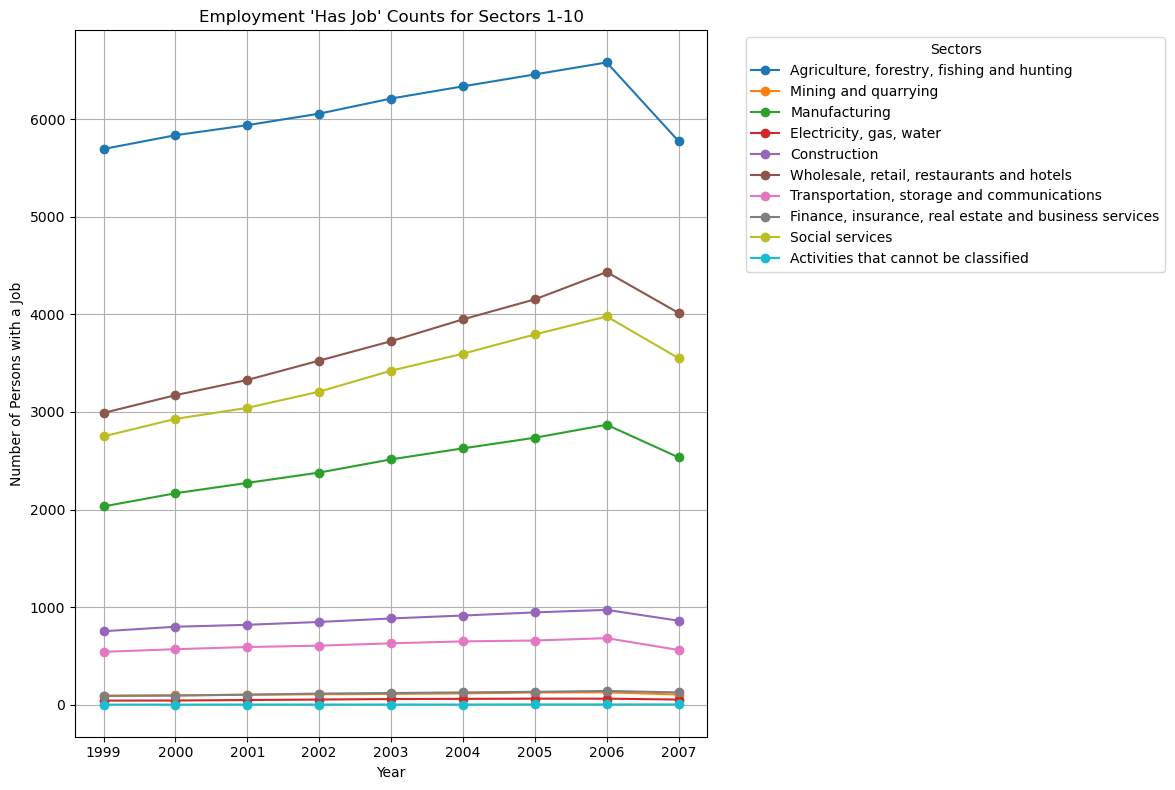

In [10]:
import matplotlib.pyplot as plt

# Mapping for sector names
mapping = {
    1: "Agriculture, forestry, fishing and hunting",
    2: "Mining and quarrying",
    3: "Manufacturing",
    4: "Electricity, gas, water",
    5: "Construction",
    6: "Wholesale, retail, restaurants and hotels",
    7: "Transportation, storage and communications",
    8: "Finance, insurance, real estate and business services",
    9: "Social services",
    10: "Activities that cannot be classified"
}

# Define the years (x-axis)
all_years = ["1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007"]

plt.figure(figsize=(12, 8))

# Loop over sectors 1 through 10
for sector in range(1, 11):
    # Get the dataframe for the current sector (assuming sector_dfs keys are integers for sectors 1-10)
    if sector in sector_dfs:
        df_sector = sector_dfs[sector]
    else:
        continue
    
    # Calculate the count of "has job" per year for this sector
    has_job_counts = [ (df_sector[year] == 'has job').sum() for year in all_years ]
    
    # Get the sector name from the mapping
    sector_name = mapping.get(sector, f"Sector {sector}")
    
    # Plot the line for this sector
    plt.plot(all_years, has_job_counts, marker='o', label=sector_name)

plt.title("Employment 'Has Job' Counts for Sectors 1-10")
plt.xlabel("Year")
plt.ylabel("Number of Persons with a Job")
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Get Total Number of Employees from each 

In [12]:
# Create a dictionary to store the data
data = {year: [] for year in all_years}

# Loop over sectors 1 through 10
for sector in range(1, 11):
    # Get the dataframe for the current sector
    if sector in sector_dfs:
        df_sector = sector_dfs[sector]
    else:
        continue
    
    # Calculate the count of "has job" per year for this sector
    for year in all_years:
        data[year].append((df_sector[year] == 'has job').sum())

# Create a DataFrame from the data
job_summary_df = pd.DataFrame(data, index=[mapping[sector] for sector in range(1, 11)])

# Display the DataFrame
job_summary_df.index.name = "Sector"
job_summary_df.columns.name = "Year"
job_summary_df

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sector,,,,,,,,,
"Agriculture, forestry, fishing and hunting",5695,5836,5939,6057,6212,6337,6459,6582,5776
Mining and quarrying,93,97,102,107,111,116,125,127,104
Manufacturing,2032,2167,2273,2379,2514,2627,2736,2869,2535
"Electricity, gas, water",42,43,48,53,58,60,62,62,53
Construction,753,799,819,848,884,914,946,972,861
"Wholesale, retail, restaurants and hotels",2990,3172,3328,3526,3725,3949,4154,4434,4015
"Transportation, storage and communications",542,569,591,605,629,649,658,682,561
"Finance, insurance, real estate and business services",90,93,103,114,120,126,132,141,126
Social services,2750,2929,3042,3208,3423,3597,3794,3979,3551
